In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
x_mean=[]
x_std=[]

In [2]:
def stand(a):
    return (a-np.mean(a))/np.std(a),np.mean(a),np.std(a)

In [3]:
import pandas as pd


df = pd.read_csv('credit_data.csv')


print(f"Number of columns in DataFrame: {df.shape[1]}")
print("Columns in DataFrame:", df.columns)


for col in range(2, 8):
    df.iloc[:, col] = pd.to_numeric(df.iloc[:, col], errors='coerce')


df.iloc[:, 6:8] = df.iloc[:, 6:8].fillna(df.iloc[:, 6:8].mean())


cols_to_standardize = [0, 2, 3, 4, 5, 6, 7, 11]
valid_cols_to_standardize = [col for col in cols_to_standardize if col < df.shape[1]]



for col in valid_cols_to_standardize:
    a_col = df.iloc[:, col].values
    sce, a1, b1 = stand(a_col)  
    df.iloc[:, col] = sce
    x_mean.append(a1)
    x_std.append(b1)

df.iloc[:, -2] = df.iloc[:, -2] > 50
k = df.iloc[:,:-1].values


Number of columns in DataFrame: 15
Columns in DataFrame: Index(['Age', 'Gender', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'Existing Customer', 'State', 'City', 'LTV Ratio', 'Employment Profile',
       'Profile Score', 'Occupation'],
      dtype='object')


C:\Users\satya\AppData\Local\Temp\ipykernel_30208\27903604.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.84940219 -1.24127671  1.17528283 ... -0.71877735  1.50184492
 -0.71877735]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, col] = sce
C:\Users\satya\AppData\Local\Temp\ipykernel_30208\27903604.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.94457593 -0.61804911  2.36733891 ... -0.12825889  2.67054238
 -1.36439612]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, col] = sce
C:\Users\satya\AppData\Local\Temp\ipykernel_30208\27903604.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.12905742 -0.83368115  1.63755224 ... -0.00584862 -1.05443649
 

In [4]:
print(k[1])

[-1.2412767106888283 'Male' -0.6180491125995813 -0.8336811476137761
 0.44570217351189934 -0.906503310926454 1.0925980258161985
 -0.46157428206908696 'No' 'Karnataka' 'Bengaluru' 1.1557236909842712
 'Salaried' False]


In [5]:
from sklearn.impute  import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(k[:, 1:15])
k[:, 1:15] = imp.transform(k[:, 1:15])



In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols_to_encode = [ 1, 8,9,10,12,13] 

for col in cols_to_encode:
    k[:, col] = le.fit_transform(k[:, col])
print(k[1])

[-1.2412767106888283 1 -0.6180491125995813 -0.8336811476137761
 0.44570217351189934 -0.906503310926454 1.0925980258161985
 -0.46157428206908696 0 2 1 1.1557236909842712 1 0]


In [7]:
k[3]

array([1.632469764301685, 0, -0.7113424883400695, 0.5215113566122936,
       0.23437377791796643, 0.43562298747985584, 1.0925980258161985,
       0.15259985227124062, 1, 2, 1, 0.9338606272921421, 2, 1],
      dtype=object)

In [8]:
k[12]

array([1.567157344415537, 0, 0.2682379569350568, -0.1775472202283034,
       -0.6966134783471976, -0.2354401617232991, 1.0925980258161985,
       -0.4303450887975449, 0, 7, 7, -1.0048185548195172, 0, 1],
      dtype=object)

In [9]:
x = k[:, :-1].astype('float')
y = k[:, -1].astype('float')
l=x.shape[0]
x_train=x[:int(0.6*l)]
x_val=x[int(0.6*l):int(0.8*l)]
x_test=x[int(0.8*l):]
y_train=y[:int(0.6*l):]
y_val = y[int(0.6*l):int(0.8*l)]
y_test=y[int(0.8*l):]
best_m=float('inf')
best_w=[]


In [10]:

def sf(z):
    return 1 / (1 + np.exp(-z))
def hf(w, x):
    return sf(x.dot(w)) >= 0.5  

def mse(h, y):
    ep = 1e-5  
    m1 = y.shape[0]
    return -(1 / m1) * (y.T.dot(np.log(h + ep)) + (1 - y).T.dot(np.log(1 - h + ep)))

def batch_gr(x, y,x_v,y_v ,epoch,l):
    m=np.shape(x)[0]
    x=np.c_[np.ones(m),x]
    w=np.ones(np.shape(x)[1])
    for i in range(1000):
        k=np.random.randint(m)
        h=x[k].dot(w)
        e=h-y[k]
        gr=(1/m)*(x[k].T.dot(e))
        w-=0.01*gr 
    x_v=np.c_[np.ones(x_v.shape[0]),x_v]  
    bb=sf(x_v.dot(w))
    val_mse=mse(bb,y_v)
    return w,val_mse

In [11]:
for epoch in [1000,5000,10000]:
    for l in [0.01,0.05,0.001]:
        w,v_mse=batch_gr(x_train, y_train,x_val,y_val,epoch,l)
        if v_mse<best_m:
            best_m=v_mse
            best_w=w

x_t = np.c_[np.ones(x_test.shape[0]), x_test]  
h1 = sf(x_t.dot(best_w))  

print(mse(h1, y_test))

1.7348909269868487


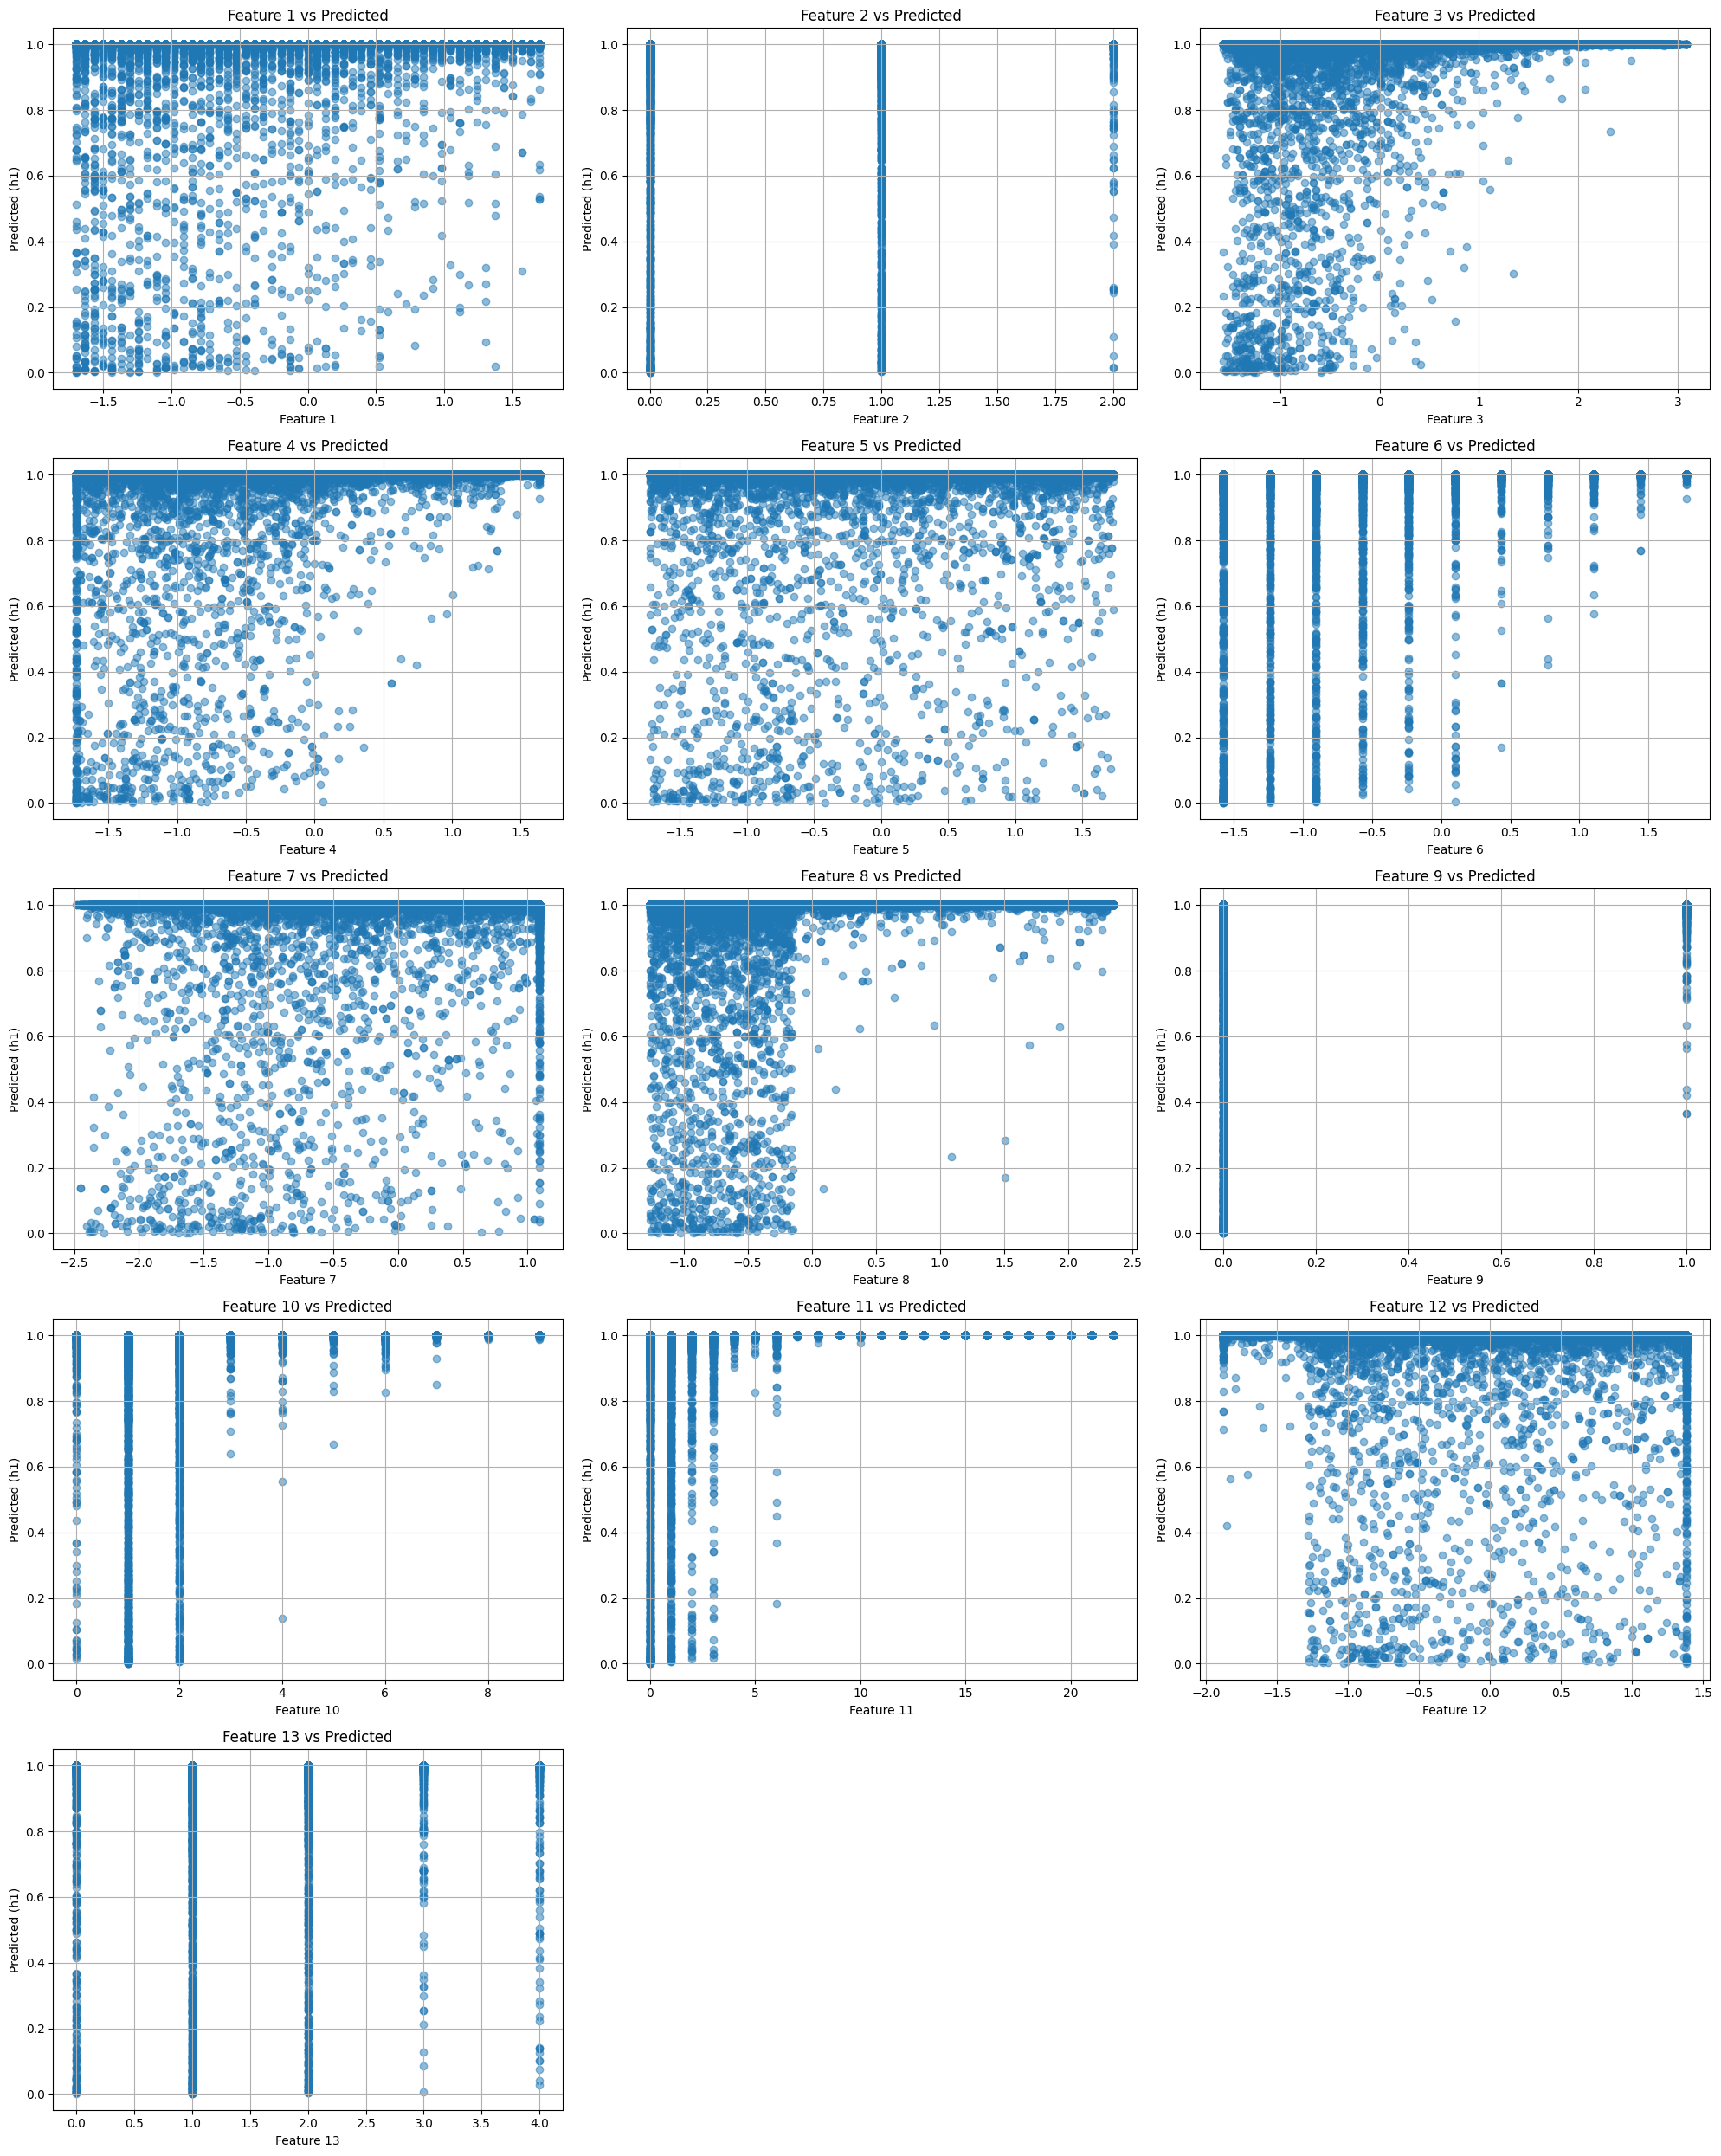

In [12]:

import math

num_features = x_test.shape[1] 

rows = math.ceil(num_features / 3)  
plt.figure(figsize=(20, rows * 5))  

for i in range(num_features):
    plt.subplot(rows, 3, i + 1)  
    plt.scatter(x_test[:, i], h1, alpha=0.5)
    plt.title(f"Feature {i+1} vs Predicted")
    plt.xlabel(f"Feature {i+1}")
    plt.ylabel("Predicted (h1)")
    plt.grid(True)

plt.tight_layout()  
plt.show()


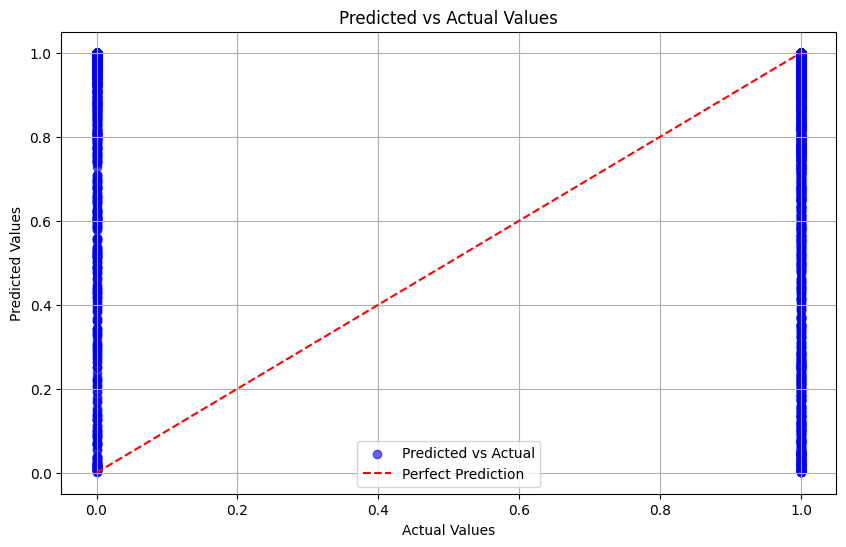

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, h1, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

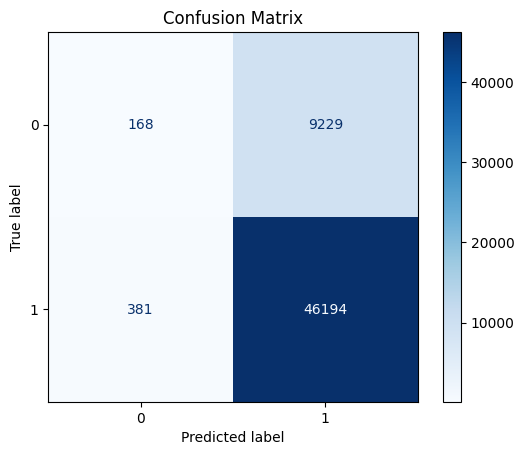

Accuracy: 0.8283070106481812
Recall: 0.9918196457326892


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

x_t = np.c_[np.ones(x_test.shape[0]), x_test] 
h1 = sf(x_t.dot(w))  

y_pred = (h1 >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")


In [15]:
print(x_mean)

[44.00521696872677, 76499.16385569722, 582.953772654508, 307.96514636098567, 4.701693013549826, 105795.34277271168, 133.34065376479333, 71.64310107537814]


Random Forest Test Accuracy: 0.9857071392839277
Random Forest Recall: 0.9931508319914117
Best Random Forest Parameters: {'n_estimators': 200, 'max_depth': None}
Random Forest outperforms Logistic Regression


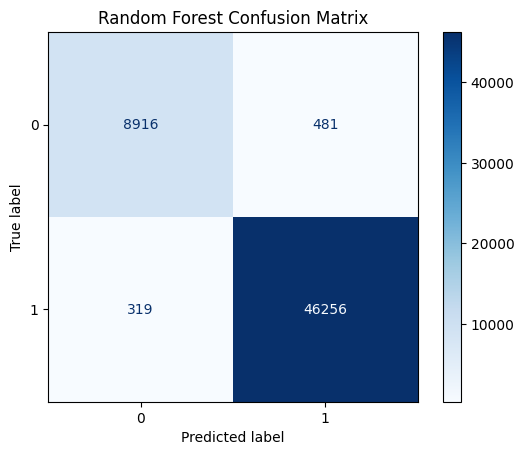

Logistic Regression Accuracy: 0.8283070106481812
Random Forest Accuracy: 0.9857071392839277


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score


best_rf_accuracy = 0
best_rf_params = None
best_rf_model = None


n_estimators_options = [50, 100, 200]
max_depth_options = [None, 10, 20]


for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_model.fit(x_train, y_train)

        
        y_rf_val_pred = rf_model.predict(x_val)
        rf_accuracy = accuracy_score(y_val, y_rf_val_pred)

        
        if rf_accuracy > best_rf_accuracy:
            best_rf_accuracy = rf_accuracy
            best_rf_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
            best_rf_model = rf_model


y_rf_test_pred = best_rf_model.predict(x_test)
rf_test_accuracy = accuracy_score(y_test, y_rf_test_pred)
rf_recall = recall_score(y_test, y_rf_test_pred)


print(f"Random Forest Test Accuracy: {rf_test_accuracy}")
print(f"Random Forest Recall: {rf_recall}")
print(f"Best Random Forest Parameters: {best_rf_params}")


if rf_test_accuracy > accuracy:
    print("Random Forest outperforms Logistic Regression")
    best_w = best_rf_model
else:
    print("Logistic Regression outperforms Random Forest")
    best_w = best_w  


rf_cm = confusion_matrix(y_test, y_rf_test_pred)
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()


print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Random Forest Accuracy: {rf_test_accuracy}")


In [17]:



data = pd.read_csv("credit_data.csv")


state_encoder = LabelEncoder()
city_encoder = LabelEncoder()
employment_encoder = LabelEncoder()


data['State_Encoded'] = state_encoder.fit_transform(data['State'])
data['City_Encoded'] = city_encoder.fit_transform(data['City'])
data['Employment_Type_Encoded'] = employment_encoder.fit_transform(data['Employment Profile'])


state_mapping = dict(zip(state_encoder.classes_, state_encoder.transform(state_encoder.classes_)))
city_mapping = dict(zip(city_encoder.classes_, city_encoder.transform(city_encoder.classes_)))
employment_mapping = dict(zip(employment_encoder.classes_, employment_encoder.transform(employment_encoder.classes_)))


print("State Mapping:", state_mapping)
print("City Mapping:", city_mapping)
print("Employment Type Mapping:", employment_mapping)


xam = [25, 'Male', 50000, 447, 386, 2, 150000, 89, 'No', 'Karnataka', 'Bengaluru', 91.13525304, 'Salaried']


for i in range(len(xam)):
    if i == 0:  
        xam[i] = (xam[i] - x_mean[0]) / x_std[0]

    elif i == 1:  
        xam[i] = 0 if xam[i] == "Male" else 1 if xam[i] == "Female" else 2

    elif i == 2:  
        xam[i] = (xam[i] - x_mean[1]) / x_std[1]

    elif i == 3:  
        xam[i] = (xam[i] - x_mean[2]) / x_std[2]

    elif i == 4:  
        xam[i] = (xam[i] - x_mean[3]) / x_std[3]

    elif i == 5:  
        xam[i] = (xam[i] - x_mean[4]) / x_std[4]

    elif i == 6:  
        xam[i] = (xam[i] - x_mean[5]) / x_std[5]

    elif i == 7:  
        xam[i] = (xam[i] - x_mean[6]) / x_std[6]

    elif i == 8:  
        xam[i] = 1 if xam[i] == "Yes" else 0

    elif i == 9:  
        xam[i] = state_mapping.get(xam[i], -1)

    elif i == 10:  
        xam[i] = city_mapping.get(xam[i], -1)

    elif i == 11:  
        xam[i] = (xam[i] - x_mean[7]) / x_std[7]

    elif i == 12:  
        xam[i] = employment_mapping.get(xam[i], -1)


if rf_test_accuracy < accuracy:
    xam = np.array(xam, dtype=float).reshape(-1, 1)
    print(hf(best_w, xam.T))
else:
    xam_array = np.array(xam).reshape(1, -1)
    rf_prediction = best_rf_model.predict(xam_array)
    print("True") if rf_prediction[0] == 1 else print("False")


State Mapping: {'Delhi': 0, 'Gujarat': 1, 'Karnataka': 2, 'Kerala': 3, 'Maharashtra': 4, 'Rajasthan': 5, 'Tamil Nadu': 6, 'Telangana': 7, 'Uttar Pradesh': 8, 'West Bengal': 9}
City Mapping: {'Ahmedabad': 0, 'Bengaluru': 1, 'Bishanpura': 2, 'Channarayapatna': 3, 'Chennai': 4, 'Coimbatore': 5, 'Dhulagori': 6, 'Hyderabad': 7, 'Jaipur': 8, 'Kanpur': 9, 'Kochi': 10, 'Kolkata': 11, 'Lucknow': 12, 'Manjari': 13, 'Mumbai': 14, 'Mysuru': 15, 'Nagpur': 16, 'Nellikuppam': 17, 'New Delhi': 18, 'Pune': 19, 'Surat': 20, 'Thiruvananthapuram': 21, 'Udaipur': 22}
Employment Type Mapping: {'Freelancer': 0, 'Salaried': 1, 'Self-Employed': 2, 'Student': 3, 'Unemployed': 4}
False


In [18]:
import pickle
if rf_test_accuracy < accuracy:
    xam=np.array(xam,dtype=float).reshape(-1,1)
    print(hf(best_w,xam.T))
    with open('C:\\Users\\satya\\OneDrive\\Documents\\ml_project\\website\\models\\vehicle_loan.pkl', 'wb') as f:
        pickle.dump(best_w, f)
   
else:
    xam_array = np.array(xam).reshape(1, -1)

    rf_prediction = best_rf_model.predict(xam_array)

    print("True") if rf_prediction[0]==1 else print("False")
    with open('C:\\Users\\satya\\OneDrive\\Documents\\ml_project\\website\\models\\vehicle_loan.pkl', 'wb') as f:
        pickle.dump(best_rf_model, f)
scaling_params = {'x_mean': x_mean, 'x_std': x_std}
with open('C:\\Users\\satya\\OneDrive\\Documents\\ml_project\\website\\models\\scaling_params_vehicle.pkl', 'wb') as f:
    pickle.dump(scaling_params, f)

False
